In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from statsmodels.tsa.seasonal import seasonal_decompose 

from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt



In [5]:
##Load data
import pandas as pd

weather = r'https://raw.githubusercontent.com/mic00s/Summer-School-2023/main/raw%20data/weather_data.csv'
datetime_cols = ['sched_1_355','sched_2_1035', 'sched_3_418', 
 'sched_4_2543', 'stop_1_355', 'stop_2_1035', 
  'stop_3_418', 'stop_4_2543']
path = r"https://raw.githubusercontent.com/mic00s/Summer-School-2023/%D1%87%D0%B5%D1%80%D0%BD%D0%BE%D0%B2%D0%B0/raw%20data/bus_data_w_iso_dates_and_delta_times.csv"
df= pd.read_csv(filepath_or_buffer=path, parse_dates=datetime_cols)

#set datetime index

#df['day'] = df['sched_1_355'].dt.day
#df['year'] = df['sched_1_355'].dt.year
df['month'] = df['sched_1_355'].dt.month
#weather['month'] = 

df.set_index('month',drop=False, inplace=True)

df.head()

,course_id,sched_1_355,sched_2_1035,sched_3_418,sched_4_2543,stop_1_355,stop_2_1035,stop_3_418,stop_4_2543,stay_1_355,...,t_stop3_to_stop4,sched_1_355_s,sched_2_1035_s,sched_3_418_s,sched_4_2543_s,stop_1_355_s,stop_2_1035_s,stop_3_418_s,stop_4_2543_s,month
month,,,,,,,,,,,,,,,,,,,,,
1,1143527,2020-01-10 05:30:29.664,2020-01-10 05:31:30.144,2020-01-10 05:33:30.240,2020-01-10 05:35:30.336,2020-01-10 05:29:30.048,2020-01-10 05:30:29.664,2020-01-10 05:31:44.832,2020-01-10 05:34:36.768,0.0,...,171.936,1.578627e+09,1.578627e+09,1.578627e+09,1.578627e+09,1.578627e+09,1.578627e+09,1.578627e+09,1.578627e+09,1
1,1143529,2020-01-10 06:42:29.664,2020-01-10 06:43:30.144,2020-01-10 06:45:30.240,2020-01-10 06:47:30.336,2020-01-10 06:41:43.872,2020-01-10 06:43:09.408,2020-01-10 06:44:33.216,2020-01-10 06:48:02.304,1.0,...,209.088,1.578631e+09,1.578631e+09,1.578632e+09,1.578632e+09,1.578631e+09,1.578631e+09,1.578631e+09,1.578632e+09,1
1,1143531,2020-01-10 07:44:30.048,2020-01-10 07:46:30.144,2020-01-10 07:48:30.240,2020-01-10 07:51:29.952,2020-01-10 07:45:08.064,2020-01-10 07:47:33.216,2020-01-10 07:48:59.616,2020-01-10 07:52:07.968,1.0,...,188.352,1.578635e+09,1.578635e+09,1.578635e+09,1.578635e+09,1.578635e+09,1.578635e+09,1.578635e+09,1.578636e+09,1
1,1143533,2020-01-10 08:58:30.144,2020-01-10 09:00:30.240,2020-01-10 09:02:30.336,2020-01-10 09:05:30.048,2020-01-10 08:58:30.144,2020-01-10 09:00:19.008,2020-01-10 09:01:31.584,2020-01-10 09:04:40.800,0.0,...,189.216,1.578640e+09,1.578640e+09,1.578640e+09,1.578640e+09,1.578640e+09,1.578640e+09,1.578640e+09,1.578640e+09,1
1,1143535,2020-01-10 10:28:30.144,2020-01-10 10:30:30.240,2020-01-10 10:32:30.336,2020-01-10 10:35:30.048,2020-01-10 10:27:38.304,2020-01-10 10:30:02.592,2020-01-10 10:31:36.768,2020-01-10 10:34:37.344,2.0,...,180.576,1.578645e+09,1.578645e+09,1.578645e+09,1.578645e+09,1.578645e+09,1.578645e+09,1.578645e+09,1.578645e+09,1


In [21]:
#show data types of variables
df.dtypes




course_id                    int64
sched_1_355         datetime64[ns]
sched_2_1035        datetime64[ns]
sched_3_418         datetime64[ns]
sched_4_2543        datetime64[ns]
stop_1_355          datetime64[ns]
stop_2_1035         datetime64[ns]
stop_3_418          datetime64[ns]
stop_4_2543         datetime64[ns]
stay_1_355                 float64
stay_2_1035                float64
stay_3_418                 float64
stay_4_2543                float64
daily_course                 int64
weekly_course                int64
t_stop1_to_stop2           float64
t_stop2_to_stop3           float64
t_stop3_to_stop4           float64
sched_1_355_s              float64
sched_2_1035_s             float64
sched_3_418_s              float64
sched_4_2543_s             float64
stop_1_355_s               float64
stop_2_1035_s              float64
stop_3_418_s               float64
stop_4_2543_s              float64
month                        int64
dtype: object

In [7]:
##preprocessing of weather data and setting index same as main data

weather_data = pd.read_csv(r'https://raw.githubusercontent.com/mic00s/Summer-School-2023/main/raw%20data/weather_data.csv', 
                           sep=';')
weather_data.fillna(0, inplace=True)
weather_data_short = weather_data[['humidity','rain_1h', 'clouds_all']]

weather_data.set_index(df['month'],drop=False, inplace=True)
weather_data_short.set_index(df['month'], drop=False, inplace=True)
weather_data.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all
month,,,,,,,,,,,,
1,-2.22,-4.29,-4.25,0.77,1023,86,1.5,0.0,0.0,0.0,0.0,1
1,-0.65,-2.50,-3.11,13.27,1024,79,1.5,0.0,0.0,0.0,0.0,1
1,0.22,0.22,-1.18,3.90,1024,69,1.0,0.0,0.0,0.0,0.0,1
1,3.75,3.75,1.82,13.37,1021,59,0.0,0.0,0.0,0.0,0.0,0
1,4.83,4.83,3.39,13.37,1023,55,1.0,0.0,0.0,0.0,0.0,1


In [8]:
##train and target#
#last two weeks to test
#target_train = target[0:7202]
#exog_train = exog[7203:]

ntrain = int(2*len(df)/3)
 
bus_train = df.iloc[:ntrain,:]
bus_test = df.iloc[ntrain:,:]
weather_train = weather_data_short.iloc[:ntrain,:]
weather_test = weather_data_short.iloc[ntrain:,:]

#weather_train.set_index(df['month'], drop=False, inplace=True)

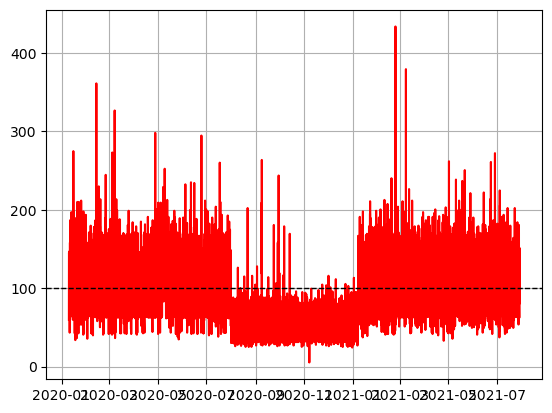

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.grid('on')
ax.plot(df.sched_1_355, df.t_stop1_to_stop2, c='r')
ax.axhline(df.t_stop1_to_stop2.mean(), c='k', ls='--', lw=1)

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df.t_stop1_to_stop2, exog=weather_data, order=(2, 1, 1), seasonal_order=(0,1,1,4))
results = model.fit()
print(results.summary())

C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                  t_stop1_to_stop2   No. Observations:                 7392
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 4)   Log Likelihood              -36458.127
Date:                           Thu, 20 Jul 2023   AIC                          72950.254
Time:                                   23:49:47   BIC                          73067.681
Sample:                                        0   HQIC                         72990.608
                                          - 7392                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp           1.0650      0.691      1.541      0.123      -0.289       2.419
feels_like    -1.0438      0.508     -2.054

In [37]:
from statsmodels.tsa.stattools import adfuller

target = df['t_stop1_to_stop2']
ad_fuller_result = adfuller(target)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.6358417872718136
p-value: 0.005111642985131518


In [38]:
#stationarity

target_diff = target.diff()

ad_fuller_result = adfuller(target_diff[1:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -25.25253208004882
p-value: 0.0


In [43]:
#residuals inspection
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

residuals = results.resid

#lbvalue, 
pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

      lb_stat  lb_pvalue
1    0.011653   0.914038
2    0.071178   0.965037
3    0.317657   0.956674
4    6.360942   0.173766
5    8.388328   0.136093
6    8.681787   0.192281
7    9.928578   0.192657
8   10.468826   0.233649
9   12.895082   0.167411
10  21.246892   0.019436


In [1]:
import matplotlib.pyplot as plt

#forecast

predicted = results.get_prediction(start=ntrain, end=len(df)-1, exog=weather_data)

ax.plot(df.sched_1_355[ntrain:], predicted.predicted_mean)

NameError: name 'results' is not defined

In [82]:
import pandas as pd

df.set_index(df.month,drop=False, inplace=True)



AttributeError: module 'pandas' has no attribute 'df'

In [83]:
#Tests

from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

MAE = mean_absolute_error(
    y_true=bus_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

MSE = mean_squared_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

RMSE = MSE**(1/2)
RMSE.round(2)

TypeError: Expected sequence or array-like, got <class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>

In [65]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
mape_last = mape(pred_df.actual, pred_df.pred_last_value)
mape_SARIMAX = mape(pred_df.actual, pred_df.pred_SARIMAX)

print(mape_last, mape_SARIMAX)

AttributeError: 'DataFrame' object has no attribute 'pred_last_value'

In [64]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

#ntrain = int(2*len(df)/3)
 
#train = df.t_stop1_to_stop2[:ntrain,:]
#test = df.t_stop1_to_stop2[ntrain:,:]

###predictions
predictions = results.predict(start=len(bus_train), end=len(bus_train)+len(bus_test)-1, dynamic=True)
rmse = sqrt(mean_squared_error(bus_test, predictions))
print('Test RMSE: %.3f' % rmse)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>)

In [56]:
def recursive_forecast(endog: Union[pd.df, list], exog: Union[pd.df, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(2,1,2), seasonal_order=(1,0,0,4), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

NameError: name 'Union' is not defined

In [55]:
target_train = target[:7203]
target_test = target[7203:]

pred_df = pd.DataFrame({'actual': target_test})

TRAIN_LEN = len(target_train)
HORIZON = len(target_test)
WINDOW = 1

pred_last_value = recursive_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_SARIMAX = recursive_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df['pred_last_value'] = pred_last_value
pred_df['pred_SARIMAX'] = pred_SARIMAX

pred_df

NameError: name 'recursive_forecast' is not defined

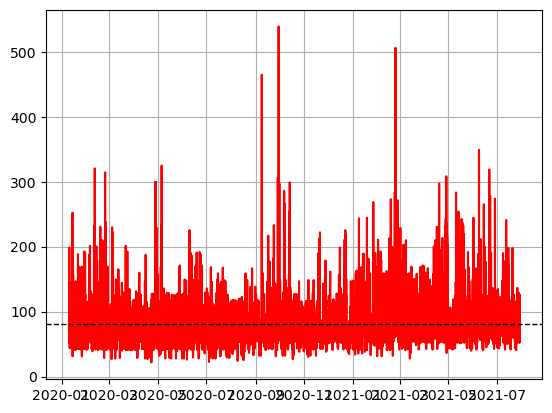

In [84]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.grid('on')
ax.plot(df.sched_1_355, df.t_stop2_to_stop3, c='r')
ax.axhline(df.t_stop2_to_stop3.mean(), c='k', ls='--', lw=1)

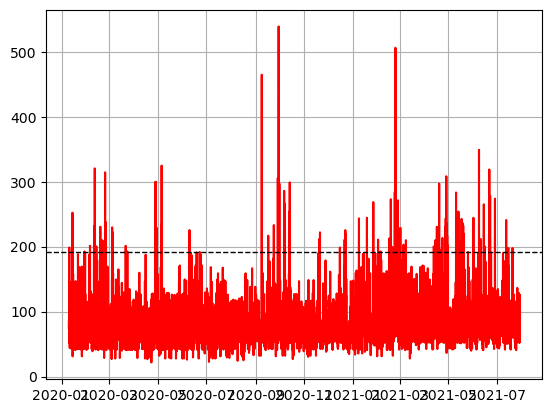

In [85]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.grid('on')
ax.plot(df.sched_1_355, df.t_stop2_to_stop3, c='r')
ax.axhline(df.t_stop3_to_stop4.mean(), c='k', ls='--', lw=1)

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2 = SARIMAX(df.t_stop2_to_stop3, exog=weather_data, order=(2, 1, 1), seasonal_order=(0,1,1,4))
results2 = model2.fit()
print(results2.summary())

C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                  t_stop2_to_stop3   No. Observations:                 7392
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 4)   Log Likelihood              -36038.768
Date:                           Fri, 21 Jul 2023   AIC                          72111.536
Time:                                   09:47:35   BIC                          72228.963
Sample:                                        0   HQIC                         72151.890
                                          - 7392                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.4860      0.721      0.674      0.500      -0.928       1.900
feels_like    -0.1911      0.524     -0.365

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model3 = SARIMAX(df.t_stop3_to_stop4, exog=weather_data, order=(2, 1, 1), seasonal_order=(0,1,1,4))
results3 = model3.fit()
print(results3.summary())

C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\4o4o\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                  t_stop3_to_stop4   No. Observations:                 7392
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 4)   Log Likelihood              -39701.469
Date:                           Fri, 21 Jul 2023   AIC                          79436.939
Time:                                   09:49:07   BIC                          79554.366
Sample:                                        0   HQIC                         79477.293
                                          - 7392                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp           1.7482      1.237      1.414      0.157      -0.675       4.172
feels_like    -1.2999      0.907     -1.432

In [ ]:
###remont 

construction_start_date = datetime(year=2020, month=8, day =1)
construction_end_date = datetime(year=2021, month = 1, hour = 12)